<a href="https://colab.research.google.com/github/gitmapd/AOC/blob/main/Euribor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
#!npx degit gitmapd/AOC/inputs inputs -f
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

The mean of last three months is: 2.332333333333333


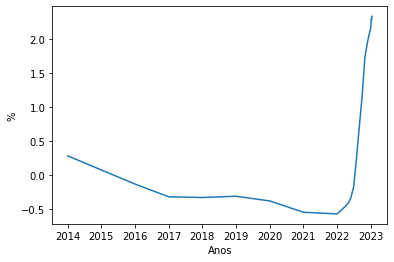

In [2]:

dic = {}
response = requests.get("https://www.euribor-rates.eu/pt/taxas-euribor-actuais/2/euribor-taxa-3-meses")
soup = BeautifulSoup(response.text,"html.parser")
a=soup.find("div",{"class":"card-body"})
for name in soup.find_all("tr"):
    cells = name.find_all("td")
    date= cells[0].text
    values = cells[1].text
    dic.update({date:values})
df = pd.DataFrame.from_dict(dic.items(), orient='columns')
df.columns = ['Date','Percentage']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Percentage']=df['Percentage'].str.replace(",",".")
df['Percentage']=df['Percentage'].str.rstrip("%").astype(float)

print(f"The mean of last three months is: {df['Percentage'][::-1].tail(3).mean()}")
plt.xlabel("Anos")
plt.ylabel("%")
plt.plot(df["Date"], df["Percentage"])


In [15]:
df

,Date,Percentage
0,2023-01-17,2.335
1,2023-01-16,2.334
2,2023-01-13,2.328
3,2023-01-12,2.288
4,2023-01-11,2.298
5,2023-01-10,2.284
6,2023-01-09,2.270
7,2023-01-06,2.254
8,2023-01-05,2.178
9,2023-01-04,2.170


In [ ]:
df_day

,Date,Percentage
0,2023-01-02,2.162
1,2022-12-30,2.132
2,2022-12-29,2.184
3,2022-12-28,2.202
4,2022-12-27,2.128
5,2022-12-23,2.141
6,2022-12-22,2.125
7,2022-12-21,2.102
8,2022-12-20,2.081
9,2022-12-19,2.063


In [12]:
from datetime import date
start = date(2022, 11, 1)
end = date(2022, 11, 30)
days = pd.bdate_range(start,end)
days_range = pd.bdate_range(start, end).format(formatter=lambda x: x.strftime('%Y-%m-%d'))
days_name = days.day_name()
days_range

['2022-11-01',
 '2022-11-02',
 '2022-11-03',
 '2022-11-04',
 '2022-11-07',
 '2022-11-08',
 '2022-11-09',
 '2022-11-10',
 '2022-11-11',
 '2022-11-14',
 '2022-11-15',
 '2022-11-16',
 '2022-11-17',
 '2022-11-18',
 '2022-11-21',
 '2022-11-22',
 '2022-11-23',
 '2022-11-24',
 '2022-11-25',
 '2022-11-28',
 '2022-11-29',
 '2022-11-30']

In [13]:
a=dict(zip(days_range,days_name))


In [14]:
a

{'2022-11-01': 'Tuesday',
 '2022-11-02': 'Wednesday',
 '2022-11-03': 'Thursday',
 '2022-11-04': 'Friday',
 '2022-11-07': 'Monday',
 '2022-11-08': 'Tuesday',
 '2022-11-09': 'Wednesday',
 '2022-11-10': 'Thursday',
 '2022-11-11': 'Friday',
 '2022-11-14': 'Monday',
 '2022-11-15': 'Tuesday',
 '2022-11-16': 'Wednesday',
 '2022-11-17': 'Thursday',
 '2022-11-18': 'Friday',
 '2022-11-21': 'Monday',
 '2022-11-22': 'Tuesday',
 '2022-11-23': 'Wednesday',
 '2022-11-24': 'Thursday',
 '2022-11-25': 'Friday',
 '2022-11-28': 'Monday',
 '2022-11-29': 'Tuesday',
 '2022-11-30': 'Wednesday'}